In [68]:
from pystac import *
from shapely.geometry import Point, Polygon, mapping
import json
from datetime import datetime

## Item identifier

The value is extracted from:

```
/Dimap_Document/Metadata_Id/Dataset_Id/DATASET_NAME
```

In [69]:
item_id = 'U200a421_000000_015499_p_L1T'

In [70]:
properties = {}

## Spatial information

The values for the coordinates are extracted from:

```
/Dimap_Document/Dataset_Frame
```

There are 4 vertex:

```xml
<Vertex>
    <FRAME_X unit="M">747725.0</FRAME_X>
    <FRAME_Y unit="M">1685189.0</FRAME_Y>
    <FRAME_LON unit="DEG">125.3062132704</FRAME_LON>
    <FRAME_LAT unit="DEG">15.23102562987</FRAME_LAT>
    <FRAME_COL>14467.0</FRAME_COL>
    <FRAME_ROW>0.0</FRAME_ROW>
</Vertex>
```

Take the FRAME_LON and FRAME_LAT and build the points with:

In [71]:
p1 = Point(125.3062132704, 15.23102562987)
p2 = Point(122.345820746, 14.86938884105)
p3 = Point(122.9974202006, 11.83916572868)
p4 = Point(125.9228087702, 12.20444482678)


In [72]:
footprint = Polygon([p.x, p.y] for p in [p1, p2, p3, p4])

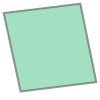

In [73]:
footprint

In [74]:
bbox = list(footprint.bounds)

bbox

[122.345820746, 11.83916572868, 125.9228087702, 15.23102562987]

In [75]:
geometry=mapping(footprint)

geometry

{'type': 'Polygon',
 'coordinates': (((125.3062132704, 15.23102562987),
   (122.345820746, 14.86938884105),
   (122.9974202006, 11.83916572868),
   (125.9228087702, 12.20444482678),
   (125.3062132704, 15.23102562987)),)}

## GSD

Extracted from 

```
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/THEORETICAL_RESOLUTION
```

In [76]:
properties['gsd'] = 22.0

## Projection

Extracted from: 

```
/Dimap_Document/Coordinate_Reference_System/Horizontal_CS/HORIZONTAL_CS_CODE
```      

In [77]:
properties['proj:epsg'] = 'EPSG:32651'

## Time

Extracted from: 

```
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/IMAGING_START_TIME
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/IMAGING_STOP_TIME
``` 

In [78]:
properties['datetime'] = '2019-12-17T23:13:38Z'
properties['start_datetime'] = '2019-12-17T23:12:48Z'
properties['end_datetime'] = '2019-12-17T23:13:38Z'

## Mission

Extracted from: 

```
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/MISSION + MISSION_INDEX
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/INSTRUMENT
```

In [79]:
properties['platform'] = 'uk-dmcii'
properties['instruments'] = ['slim-6-22']
properties['mission'] = 'uk-dmc'

## Processing

Extracted from: 

```
/Dimap_Document/Production/PRODUCT_TYPE
/Dimap_Document/Production/DATASET_PRODUCTION_DATE

```

In [80]:
properties['processing:level'] = 'L1T'
properties['created'] = "2016-01-13T00:00:00Z"

## Sat

None?

## View

Extracted from: 

```
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/VIEWING_ANGLE
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/SUN_AZIMUTH
/Dimap_Document/Dataset_Sources/Source_Information/Scene_Source/SUN_ELEVATION
```

In [81]:
properties['view:azimuth'] = 0.3413209478422
properties['view:sun_azimuth'] = 119.1912660753
properties['view:sun_elevation'] = 15.28536160123

## Item and assets creation

In [82]:
item = Item(id=item_id, 
           geometry=geometry,
           bbox=bbox,
           datetime=datetime.strptime(properties['datetime'], '%Y-%m-%dT%H:%M:%SZ'),
           properties=properties,
           stac_extensions=['eo', 'proj', 'view', 'processing'])

In [83]:
asset = Asset(href='./ORTHO-U2005b3d_030000_045499_s_L1T-20160113-145544/{}'.format('U200a421_000000_015499_p_L1T.tif'),
              media_type=MediaType.GEOTIFF,
              roles=['data'])

The band list ['nir', 'red', 'green'] is defined in the dimap file:

```xml
<Image_Interpretation>
        <Spectral_Band_Info>
            <BAND_INDEX>1</BAND_INDEX>
            <BAND_DESCRIPTION>NIR</BAND_DESCRIPTION>
            <PHYSICAL_GAIN>1.4237047959488924</PHYSICAL_GAIN>
            <PHYSICAL_BIAS>16.715571904750256</PHYSICAL_BIAS>
            <PHYSICAL_UNIT>W/m2/sr/m-6</PHYSICAL_UNIT>
        </Spectral_Band_Info>
        <Spectral_Band_Info>
            <BAND_INDEX>2</BAND_INDEX>
            <BAND_DESCRIPTION>Red</BAND_DESCRIPTION>
            <PHYSICAL_GAIN>1.4125939046816456</PHYSICAL_GAIN>
            <PHYSICAL_BIAS>18.13352421041051</PHYSICAL_BIAS>
            <PHYSICAL_UNIT>W/m2/sr/m-6</PHYSICAL_UNIT>
        </Spectral_Band_Info>
        <Spectral_Band_Info>
            <BAND_INDEX>3</BAND_INDEX>
            <BAND_DESCRIPTION>Green</BAND_DESCRIPTION>
            <PHYSICAL_GAIN>1.7182582768158448</PHYSICAL_GAIN>
            <PHYSICAL_BIAS>29.810625525690778</PHYSICAL_BIAS>
            <PHYSICAL_UNIT>W/m2/sr/m-6</PHYSICAL_UNIT>
        </Spectral_Band_Info>
    </Image_Interpretation>
```

In [84]:

eo_bands = [extensions.eo.Band.create(name=b, 
                          common_name=str.lower(b),
                          center_wavelength=0.0,
                          description=f'{b} radiance in W/m2/sr/m-6') for b in ['NIR', 'red', 'green']]

eo_bands

[<Band name=NIR>, <Band name=red>, <Band name=green>]

In [85]:
eo_item = extensions.eo.EOItemExt(item)
eo_item.set_bands(eo_bands, asset=asset)

eo_item.set_bands(eo_bands)
eo_item.apply(eo_bands) 

In [86]:
item.add_asset(key='composite', asset=asset)

<Item id=U200a421_000000_015499_p_L1T>

In [87]:
item.add_asset(key='metadata', asset=Asset(href='./ORTHO-U2005b3d_030000_045499_s_L1T-20160113-145544/{}'.format('U200a421_000000_015499_p_L1T.dim'),
                                           media_type=MediaType.XML,
                                           roles=['metadata']))

<Item id=U200a421_000000_015499_p_L1T>

In [88]:
item.add_asset(key='overview', asset=Asset(href='./ORTHO-U2005b3d_030000_045499_s_L1T-20160113-145544/{}'.format('U200a421_000000_015499_p_L1T_browse.jpg'),
                                           media_type=MediaType.JPEG,
                                           roles=['overview']))

<Item id=U200a421_000000_015499_p_L1T>

In [89]:
item.to_dict()

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'U200a421_000000_015499_p_L1T',
 'properties': {'gsd': 22.0,
  'proj:epsg': 'EPSG:32651',
  'datetime': '2019-12-17T23:13:38Z',
  'start_datetime': '2019-12-17T23:12:48Z',
  'end_datetime': '2019-12-17T23:13:38Z',
  'platform': 'uk-dmcii',
  'instruments': ['slim-6-22'],
  'mission': 'uk-dmc',
  'processing:level': 'L1T',
  'created': '2016-01-13T00:00:00Z',
  'view:azimuth': 0.3413209478422,
  'view:sun_azimuth': 119.1912660753,
  'view:sun_elevation': 15.28536160123,
  'eo:bands': [{'name': 'NIR',
    'common_name': 'NIR',
    'description': 'NIR radiance in W/m2/sr/m-6',
    'center_wavelength': 0.0},
   {'name': 'red',
    'common_name': 'red',
    'description': 'red radiance in W/m2/sr/m-6',
    'center_wavelength': 0.0},
   {'name': 'green',
    'common_name': 'green',
    'description': 'green radiance in W/m2/sr/m-6',
    'center_wavelength': 0.0}],
  'eo:cloud_cover': None},
 'geometry': {'type': 'Polygon',
  'coordin

## Write item to disk

In [90]:
write_file(item, include_self_link=True, dest_href=f'MetadataExtractorsTests_{item.id}.json')

## Update calibration information

In [91]:
with open(f'MetadataExtractorsTests_{item.id}.json') as f:
    data = json.load(f)

In [92]:
data['assets']['data']['eo:bands']

KeyError: 'data'

## Calibration factors from DN to radiance

```
/Dimap_Document/Image_Interpretation/Spectral_Band_Info/ PHYSICAL_GAIN PHYSICAL_BIAS
```

In [60]:
gain = [3.35788685716842, 5.758028652681285, 6.447066283217543]
offset = [3.401283466071499, 6.376285553051935, 10.18074661820037]

Calibration ESUN values from table 18  DMC Data Product Manual-v2.pdf

In [61]:
eai = [1036.0, 1561.0, 1811.0]

In [62]:
for index, band in enumerate(data['assets']['data']['eo:bands']): 
    band['scale'] = gain[index]
    band['offset'] = offset[index]
    band['eai'] = eai[index]
    print(band)
    
    data['assets']['data']['eo:bands'][index] = band
    data['properties']['eo:bands'][index] = band

{'name': 'nir', 'common_name': 'nir', 'description': 'nir radiance in W/m2/sr/m-6', 'scale': 3.35788685716842, 'offset': 3.401283466071499, 'eai': 1036.0}
{'name': 'red', 'common_name': 'red', 'description': 'red radiance in W/m2/sr/m-6', 'scale': 5.758028652681285, 'offset': 6.376285553051935, 'eai': 1561.0}
{'name': 'green', 'common_name': 'green', 'description': 'green radiance in W/m2/sr/m-6', 'scale': 6.447066283217543, 'offset': 10.18074661820037, 'eai': 1811.0}


In [63]:
data

{'type': 'Feature',
 'stac_version': '1.0.0-beta3',
 'id': 'U200a421_000000_015499_p_L1T',
 'properties': {'gsd': 22.0,
  'proj:epsg': 'EPSG:32651',
  'datetime': '2019-12-17T23:13:38Z',
  'start_datetime': '2019-12-17T23:12:48Z',
  'end_datetime': '2019-12-17T23:13:38Z',
  'platform': 'uk-dmcii',
  'instruments': ['slim-6-22'],
  'mission': 'uk-dmc',
  'processing:level': 'L1T',
  'created': '2016-01-13T00:00:00Z',
  'view:azimuth': 0.3413209478422,
  'view:sun_azimuth': 119.1912660753,
  'view:sun_elevation': 15.28536160123,
  'eo:bands': [{'name': 'nir',
    'common_name': 'nir',
    'description': 'nir radiance in W/m2/sr/m-6',
    'scale': 3.35788685716842,
    'offset': 3.401283466071499,
    'eai': 1036.0},
   {'name': 'red',
    'common_name': 'red',
    'description': 'red radiance in W/m2/sr/m-6',
    'scale': 5.758028652681285,
    'offset': 6.376285553051935,
    'eai': 1561.0},
   {'name': 'green',
    'common_name': 'green',
    'description': 'green radiance in W/m2/sr/m

## Write to disk

In [64]:
with open(f'MetadataExtractorsTests_{item.id}.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)